# Perceptron
---

Codes are writen by simonjisu.
* Simonjisu Blog: https://simonjisu.github.io
* Project Numpy with NN: https://github.com/simonjisu/NUMPYwithNN

## How to solve XOR problem?
---

## Goal

Can a linear function solve under inputs and results?

$y = f(x_1, x_2) = 
\begin{cases}
0\ ,\quad x_1=x_2=0\ or\ x_1=x_2=1 \\
1\ ,\quad x_1=0, x_2=1\ or\ x_1=1, x_2=0
\end{cases}$

| $x_1$ | $x_2$ | $y$ |
|:--:|:--:|:--:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|0|

A linear function can't, but 2 linear functions can

### AND Gate

$$
y = 
\begin{cases}
  0\ \ (b + w_1x_1 + w_2x_2 \leq 0) \\
  1\ \ (b + w_1x_1 + w_2x_2 > 0) \\ 
\end{cases}
$$

$w_1, w_2 > 0,\ b<0 $ and $|w_1|, |w_2| \leq |b|$

| $x_1$ | $x_2$ | $y$ |
|:--:|:--:|:--:|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

In [1]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [2]:
xx = [[0, 0], [0, 1], [1, 0], [1, 1]]
for x in xx:
    print('AND({0},{1}) : {2}'.format(x[0], x[1], AND(x[0], x[1])))

AND(0,0) : 0
AND(0,1) : 0
AND(1,0) : 0
AND(1,1) : 1


### NAND Gate

$$
y = 
\begin{cases}
  0\ \ (b + w_1x_1 + w_2x_2 \leq 0) \\
  1\ \ (b + w_1x_1 + w_2x_2 > 0) \\ 
\end{cases}
$$

$w_1, w_2 < 0,\ b > 0 $ and $|w_1|, |w_2| \leq |b|$

| $x_1$ | $x_2$ | $y$ |
|:--:|:--:|:--:|
|0|0|1|
|1|0|1|
|0|1|1|
|1|1|0|


In [3]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [4]:
xx = [[0, 0], [0, 1], [1, 0], [1, 1]]
for x in xx:
    print('NAND({0},{1}) : {2}'.format(x[0], x[1], NAND(x[0], x[1])))

NAND(0,0) : 1
NAND(0,1) : 1
NAND(1,0) : 1
NAND(1,1) : 0


### OR Gate

$$
y = 
\begin{cases}
  0\ \ (b + w_1x_1 + w_2x_2 \leq 0) \\
  1\ \ (b + w_1x_1 + w_2x_2 > 0) \\ 
\end{cases}
$$

$w_1, w_2 > 0,\ b < 0 $ and $|w_1|, |w_2| \geq |b|$

| $x_1$ | $x_2$ | $y$ |
|:--:|:--:|:--:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|1|


In [5]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [6]:
xx = [[0, 0], [0, 1], [1, 0], [1, 1]]
for x in xx:
    print('OR({0},{1}) : {2}'.format(x[0], x[1], OR(x[0], x[1])))

OR(0,0) : 0
OR(0,1) : 1
OR(1,0) : 1
OR(1,1) : 1


### plot

red points "x" equal to 0, "o" equal to 1

We can see a Linear function can classify x.

In [7]:
def get_x2(x1, w_idx, b_idx):
    w_points = np.array([[0.5, 0.5],
                     [-0.5, -0.5],
                     [0.5, 0.5]])
    b_points = [-0.7, 0.7, -0.2]
    return (-b_points[b_idx] - w_points[w_idx][0] * x1) / w_points[w_idx][1]

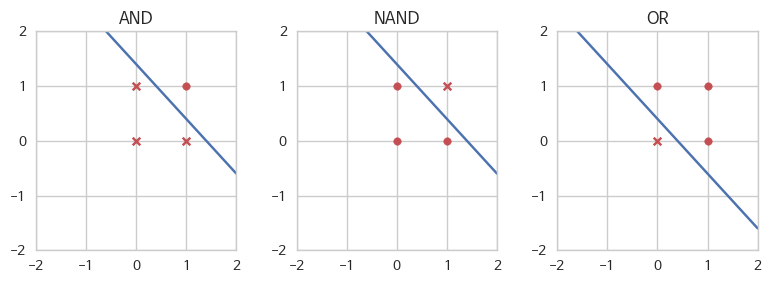

In [8]:
fig = plt.figure(figsize=(8, 3), dpi=100)
# AND
ax1 = fig.add_subplot(1,3,1)
ax1.scatter([1], [1], s=30, c='r', marker='o')
ax1.scatter([0, 0, 1], [0, 1, 0], s=30, c='r', marker='x')
ax1.plot([-2, 2], [get_x2(-2, 0, 0), get_x2(2, 0, 0)])
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
ax1.set_title('AND')
# NAND
ax2 = fig.add_subplot(1,3,2)
ax2.scatter([0, 0, 1], [0, 1, 0], s=30, c='r', marker='o')
ax2.scatter([1], [1], s=30, c='r', marker='x')
ax2.plot([-2, 2], [get_x2(-2, 1, 1), get_x2(2, 1, 1)])
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.set_title('NAND')
# OR
ax3 = fig.add_subplot(1,3,3)
ax3.scatter([1, 0, 1], [0, 1, 1], s=30, c='r', marker='o')
ax3.scatter([0], [0], s=30, c='r', marker='x')
ax3.plot([-2, 2], [get_x2(-2, 2, 2), get_x2(2, 2, 2)])
ax3.set_xlim([-2, 2])
ax3.set_ylim([-2, 2])
ax3.set_title('OR')
plt.tight_layout()
plt.show()

### XOR

However XOR Problem is something like under graph

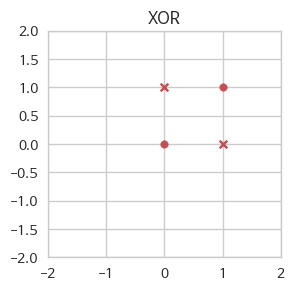

In [9]:
fig = plt.figure(figsize=(3, 3), dpi=100)
ax4 = fig.add_subplot(1,1,1)
ax4.scatter([0, 1], [0, 1], s=30, c='r', marker='o')
ax4.scatter([0, 1], [1, 0], s=30, c='r', marker='x')
# ax4.plot([-2, 2], [get_x2(-2, 0, 0), get_x2(2, 0, 0)])
ax4.set_xlim([-2, 2])
ax4.set_ylim([-2, 2])
ax4.set_title('XOR')
plt.show()

A linear function can't solve this. But if we add 2 linear function together, then we can solve this problem.

| $x_1$ | $x_2$ | $s_1$ | $s_2$ | $y$ |
|:--:|:--:|:--:|:--:|:--:|:--:|
|0|0|1|0|0|
|1|0|1|1|1|
|0|1|1|1|1|
|1|1|0|1|0|


In [10]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [11]:
xx = [[0, 0], [0, 1], [1, 0], [1, 1]]
for x in xx:
    print('XOR({0},{1}) : {2}'.format(x[0], x[1], XOR(x[0], x[1])))

XOR(0,0) : 0
XOR(0,1) : 1
XOR(1,0) : 1
XOR(1,1) : 0
